# Линейные модели, SVM и деревья решений.

## Подготовка

Загрузка датасета

In [1]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [2]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

Заполнение пропусков

In [3]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        num_cols.append(col)
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

Матрица корреляций

<Axes: >

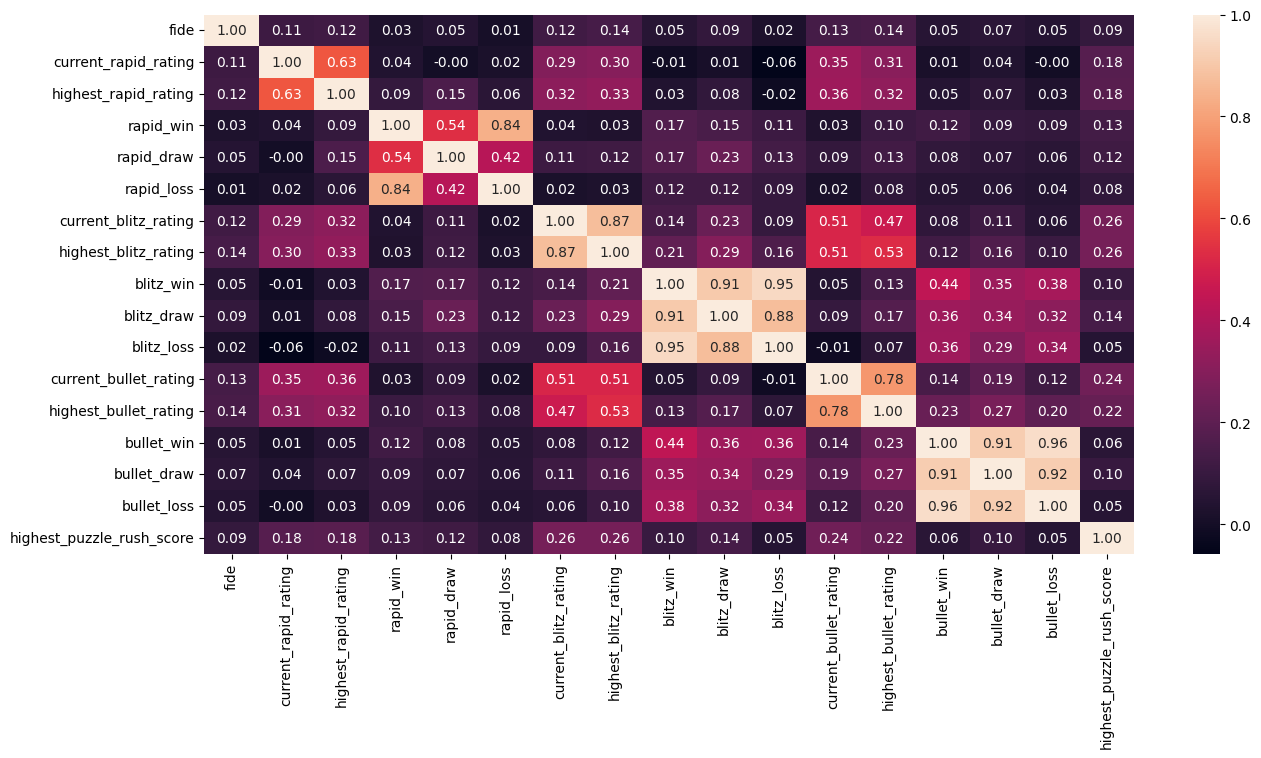

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Кодирование категориального признака `league`

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_enc_le = le.fit_transform(df['league'])
df['league_coded'] = cat_enc_le

## Разделение выборки на обучающую и тестовую

In [5]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols].drop(columns='highest_rapid_rating') # числовые колонки

y_df = df['highest_rapid_rating'] # колонка с самым высоким рейтингом по рапиду

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Линейная регрессия

Создаём объект `LinearRegression`, загружаем данные для обучения. Получаем коэффициенты линейной регрессии

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_regr = LinearRegression().fit(np.array(x_train), np.array(y_train))
linear_regr.coef_

array([ 0.00678926,  0.41581834, -0.00156536,  0.71790469, -0.00328312,
        0.01749251,  0.02695972, -0.00305505,  0.07226446, -0.009803  ,
        0.07232053,  0.02599858,  0.00233375, -0.03868318,  0.00268067,
        0.27439654])

Предсказанные значения:

In [7]:
y_predict = linear_regr.predict(x_test)
y_predict

C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1864.10323384, 2556.16594508, 2559.84615056, 2545.19498769,
       2524.74427193, 2649.29263311, 2634.34700348, 2587.34637373,
       2558.4611405 , 2629.2350959 , 2622.78313325, 2637.21241291,
       2584.97135224, 2528.92551904, 2685.58832853, 2558.0389039 ,
       2144.91187336, 2529.46690826, 2541.46790409, 2568.16617438,
       2838.97942723, 2675.94429703, 2563.39088332, 2556.0167851 ,
       2611.88652136, 2570.37888163, 2655.50066417, 2584.16557421,
       2582.29232094, 2504.79304754, 2520.78596772, 2556.16594508,
       2605.19970832, 2711.61701101, 2623.47605116, 2565.21587016,
       2691.83947872, 2524.06706062, 2536.5569937 , 2491.1208013 ,
       2698.2035079 , 2543.0253666 , 2564.10580162, 2766.71468998,
       2546.04022047, 2818.44907716, 2561.50513999, 2544.75348632,
       2359.32342932, 2635.42212756, 2300.20332266, 2559.80364999,
       2563.05763665, 2435.32166126, 2560.89942329, 2490.85617147,
       2469.22494161, 2441.21680246, 1925.56233798, 2522.55218

Оценка качества при помощи `r2_score`

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_score(y_test, y_predict), mean_absolute_error(y_test, y_predict)

(0.4654381988230092, 104.12757079584122)

## Метод опорных векторов

In [10]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=1.0, max_iter=10000).fit(x_train, y_train)

C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
y_predict_svr = linear_svr.predict(x_test)
y_predict_svr

array([1650.39743657, 2690.29021209, 2697.9080864 , 2697.45001647,
       2738.23745622, 2865.4055917 , 2803.3833789 , 2817.13588304,
       2695.04117243, 2793.49143235, 2906.08434489, 2853.49503485,
       2756.00476954, 2608.58848415, 2865.78551257, 2709.48288643,
       2157.32380865, 2599.76669952, 2583.18610719, 2742.91521136,
       3145.56631461, 2874.57042099, 2865.57379071, 2661.73549502,
       2792.70153291, 2760.8153916 , 2823.30657048, 2778.86639067,
       2784.90250164, 2523.26736196, 2547.38475963, 2690.29021209,
       2730.40651719, 2713.50514548, 2787.03306425, 2747.92117694,
       2881.45053237, 2528.76349168, 2582.4957934 , 2555.68547945,
       2923.99184038, 2713.22368334, 2712.2482677 , 2983.07040535,
       2643.25715519, 2945.44592652, 2714.51283195, 2588.77308812,
       2383.4698273 , 2785.74898265, 2190.26385414, 2760.32893701,
       2694.62596579, 2578.18540095, 2642.88925745, 2517.67160845,
       2444.14492261, 2521.70506001, 1815.30697096, 2465.24411

In [12]:
r2_score(y_test, y_predict_svr), mean_absolute_error(y_test, y_predict_svr)

(-0.11613775897004075, 176.49697484781694)

## Дерево решений

Обучение

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5) # max_depth задаём, потому что иначе дерево будет слишком большим

In [12]:
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [13]:
tree_predict = tree_reg.predict(x_test)

In [16]:
r2_score(y_test, tree_predict), mean_absolute_error(y_test, tree_predict)

(0.31034587253847723, 102.63443962254959)

Визуализация дерева решений

In [17]:
from sklearn.tree import export_text
from IPython.core.display import HTML

tree_rules = export_text(tree_reg, feature_names=list(x_train.columns))
HTML('<pre>' + tree_rules + '</pre>')

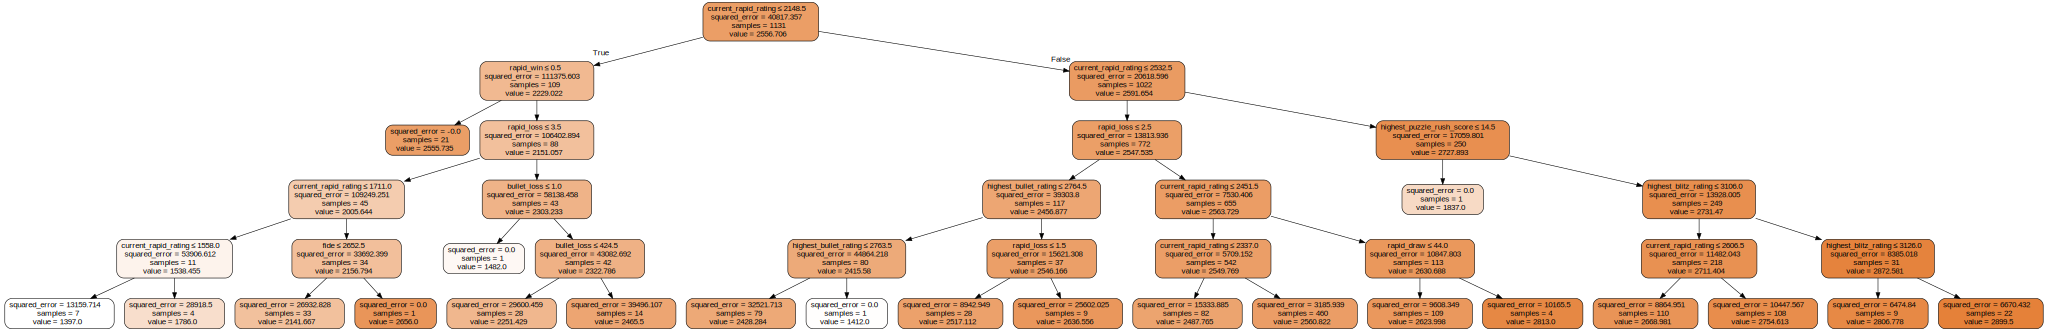

In [19]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_reg, out_file=None, 
                           feature_names=list(x_train.columns),
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph

График, показывающий важность признаков в дереве решений

In [22]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data


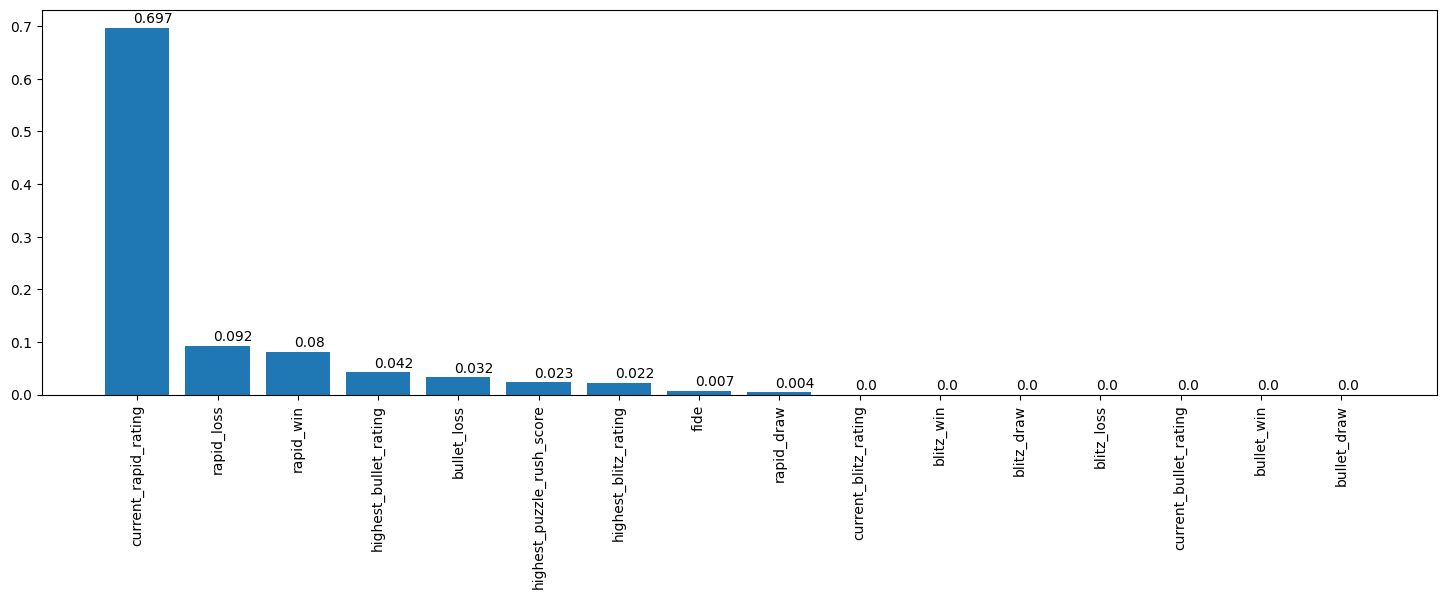

In [23]:
chess_tree_regr_fl, chess_tree_regr_fd = draw_feature_importances(tree_reg, x_df)

## Сравнение оценок каждого метода обучения

In [24]:
r2_score(y_test, y_predict), mean_absolute_error(y_test, y_predict)

(0.4654381988230092, 104.12757079584122)

In [25]:
r2_score(y_test, y_predict_svr), mean_absolute_error(y_test, y_predict_svr)

(-0.11613775897004075, 176.49697484781694)

In [26]:
r2_score(y_test, tree_predict), mean_absolute_error(y_test, tree_predict)

(0.31034587253847723, 102.63443962254959)